In [36]:
%matplotlib inline
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pickle

from os import listdir
from os.path import isfile, join
from pathlib import Path

import sys
import random

In [37]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def gray2rgb(gray):

    rgb = np.stack((gray,)*3, axis=-1)

    return rgb
    

def rescale_values(image,max_val,min_val):
    '''
    image - numpy array
    max_val/min_val - float
    '''
    return (image-image.min())/(image.max()-image.min())*(max_val-min_val)+min_val

SEED=0
np.random.seed(SEED)
import os
os.environ['PYTHONHASHSEED']=str(SEED)

import random
random.seed(SEED)

from glob import glob
# random.sample(cat_names,k=6000)
cat_paths = glob('./images/cat/*')
dog_paths = glob('./images/dog/*')
print('total dogs and cats:', len(dog_paths), len(cat_paths))

folder=''
watermark_path_jpeg=folder+'watermark banner.jpg'
image_size=(128,128)
intensity=0.8 # opacity

total dogs and cats: 6000 6000


In [128]:
def preprocess_watermark(watermark_path, image_shape=(128,128)):
    watermark = Image.open(watermark_path)

    #resize watermark to cover the entire background width without getting deformed
    w=int(image_shape[0])
    h=int(watermark.size[1]*image_shape[0]/watermark.size[0])
    watermark = np.array(watermark.resize((w,h)))


    #turning watermark into grayscale
    rgb=rescale_values(watermark,1,0)
    r, g, blue = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 1-(0.2989 * r + 0.5870 * g + 0.1140 * blue)


    # trim excess rows and cols
    non_trimmed_row_indices =[i for i in range(gray.shape[0]) if not np.allclose(gray[i,:],1)]
    watermark_trimmed = gray[non_trimmed_row_indices,:]

    non_trimmed_col_indices =[i for i in range(watermark_trimmed.shape[1]) if not np.allclose(watermark_trimmed[:,i],1)]
    watermark_trimmed = watermark_trimmed[:,non_trimmed_col_indices]

    return watermark_trimmed

In [153]:
def get_watermark_position(watermark_shape, image_shape=(128,128)):
    rand_y = np.random.randint(0, high= (image_shape[0])-watermark_shape[0])
    rand_x = np.random.randint(0, high= (image_shape[1])-watermark_shape[1])

    return rand_y, rand_x

In [137]:
# wm_preprocessed = preprocess_watermark(watermark_path_jpeg)

(54, 13)
(21, 17)
(35, 13)
(8, 21)
(45, 5)
(16, 14)
(37, 1)
(5, 6)
(12, 10)
(54, 14)
(62, 8)
(71, 13)
(5, 15)
(59, 10)
(67, 10)
(57, 3)
(78, 18)
(69, 4)
(17, 5)
(63, 3)
(69, 8)
(36, 17)
(55, 1)
(18, 1)
(78, 17)
(7, 21)
(46, 16)
(33, 17)
(29, 12)
(46, 0)
(34, 19)
(25, 14)
(52, 9)
(64, 12)
(73, 18)
(4, 7)
(3, 16)
(76, 5)
(48, 13)
(51, 17)
(71, 17)
(29, 3)
(74, 20)
(65, 20)
(80, 10)
(28, 20)
(48, 2)
(9, 2)
(68, 9)
(10, 12)
(37, 7)
(32, 1)
(26, 3)
(50, 18)
(20, 8)
(18, 7)
(28, 18)
(67, 12)
(45, 0)
(10, 3)
(6, 3)
(57, 6)
(19, 2)
(50, 18)
(20, 11)
(0, 4)
(66, 1)
(12, 15)
(33, 12)
(5, 6)
(1, 10)
(6, 6)
(38, 11)
(50, 19)
(2, 12)
(29, 9)
(72, 5)
(53, 11)
(65, 11)
(79, 12)
(47, 12)
(21, 18)
(13, 12)
(6, 4)
(48, 8)
(26, 5)
(15, 5)
(37, 17)
(80, 0)
(62, 10)
(12, 0)
(29, 7)
(22, 19)
(5, 4)
(5, 12)
(26, 17)
(12, 6)
(7, 20)
(80, 0)
(79, 10)


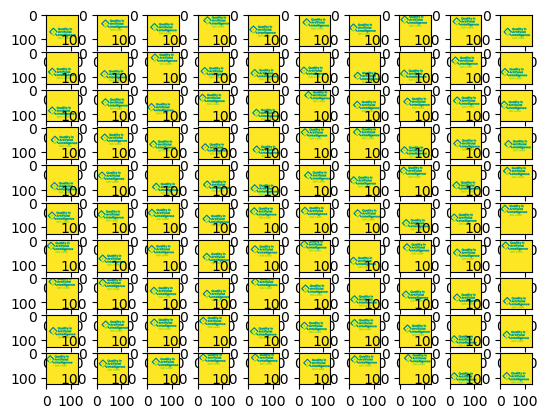

In [156]:
# n=10
# fig,axs=plt.subplots(n,n)

# wm_shape = wm_preprocessed.shape

# ind = 0
# for i in range(n):
#     for j in range(n):
#         pos = get_watermark_position(wm_preprocessed.shape)
#         background = np.ones((128,128))

#         background[pos[0]:pos[0]+wm_shape[0], pos[1]:pos[1]+wm_shape[1]] = wm_preprocessed
#         axs[i,j].imshow(background)
#         ind+=1
# plt.show()

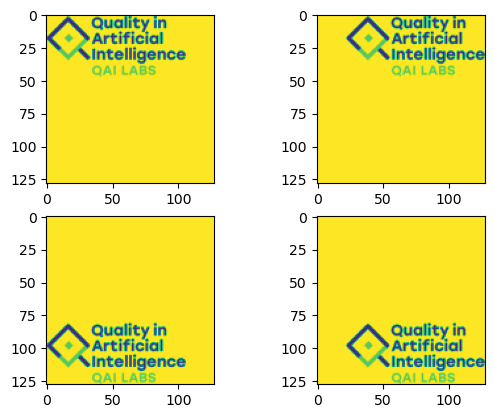

In [165]:
# fig, axs = plt.subplots(2,2)

# background = np.ones((128,128))

# poses = [[(0,0), (0,max_x)], [(max_y,0),(max_y,max_x)]]

# for j in range(2):
#     for i in range(2):
#         pos = poses[j][i]
#         background = np.ones((128,128))
#         background[pos[0]:pos[0]+wm_shape[0], pos[1]:pos[1]+wm_shape[1]] = wm_preprocessed
#         axs[j,i].imshow(background)

# # pos = (0,0)
# # background[pos[0]:pos[0]+wm_shape[0], pos[1]:pos[1]+wm_shape[1]] = wm_preprocessed

# # axs[0,0] = plt.imshow(background)

# # pos = (max_y,max_x)
# # background = np.ones((128,128))
# # background[pos[0]:pos[0]+wm_shape[0], pos[1]:pos[1]+wm_shape[1]] = wm_preprocessed

# # axs[0,1] = plt.imshow(background)

In [179]:
def add_watermark_variable(background_image_path,watermark_path, intensity_watermark,image_size,white_bool=1):
    #watermark should be jpg with white background
    #lower intensity_watermark leads to a more transparent watermark in the final image (less contrast)
    # white_bool is a bool that indicated if the watermark to add is white or black
    
    background_image = Image.open(background_image_path)
    background_image = background_image.resize(image_size)
    background_image=np.array(background_image)
    b=rescale_values(background_image,1,0)


    wm_preprocessed = preprocess_watermark(watermark_path_jpeg)
    wm_shape = wm_preprocessed.shape
    pos = get_watermark_position(wm_shape)

    #padding watermark to be an image the same size as the background image
    white=np.ones((b.shape[0],b.shape[1]))
    white[pos[0]:pos[0]+wm_shape[0], pos[1]:pos[1]+wm_shape[1]] = wm_preprocessed

    # grayscale watermark with 3 channels
    gr=np.repeat(white[..., np.newaxis], 3, axis=2)

    if white_bool:
        im=1-b
        gr_p=rescale_values(gr,1,1-intensity_watermark)
        i_2=im*gr_p
        output_image=1-(i_2)
    else:
        im=rescale_values(b,1,0)
        gr_p=rescale_values(gr,1,1-intensity_watermark)
        output_image=im*gr_p
     
    #output_image=0
    return output_image, gr_p

In [176]:
white_bool=1
dog_names = list(np.array(dog_paths))

test_ind = 0
intensity_watermark = intensity

out_im, wm =add_watermark_variable(dog_names[test_ind], watermark_path_jpeg, intensity_watermark, image_size, white_bool)

In [178]:
wm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

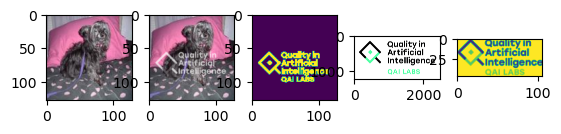

In [177]:
fig, axs = plt.subplots(1,5)
axs[0].imshow(Image.open(dog_names[test_ind]))
axs[1].imshow(out_im)
axs[2].imshow(wm)
axs[3].imshow(Image.open(watermark_path_jpeg))
axs[4].imshow(preprocess_watermark(watermark_path_jpeg))

In [181]:
def save_images(wm_prev_cat, wm_prev_dog,cat_files,dog_files,watermark_path,image_size,intensity_watermark,output_path,white_bool):
    with_watermark_cat=np.random.choice(cat_files,size=int(len(cat_files)*wm_prev_cat), replace=False)
    with_watermark_dog=np.random.choice(dog_files,size=int(len(dog_files)*wm_prev_dog), replace=False)

    print(f'creating dataset {output_path}')
    print("prevs", wm_prev_cat, wm_prev_dog)
    print('num cat', len(cat_files))
    print('num dog', len(dog_files))
    print('wm cat:', int(len(cat_files)*wm_prev_cat), len(with_watermark_cat))
    print('wm dog:', int(len(dog_files)*wm_prev_dog), len(with_watermark_dog))

    # Path(output_path).mkdir(parents=True, exist_ok=True)
    n_water=0
    n_no_water=0

    data = np.zeros((len(cat_files) + len(dog_files), 128, 128, 3))
    labels = np.zeros((len(cat_files) + len(dog_files), 1))
    labels[len(cat_files):] = 1
    watermark_inds = [with_watermark_cat, with_watermark_dog]

    for i, image in enumerate(cat_files):
        if image in with_watermark_cat:
            out_im=add_watermark_variable(image,watermark_path,intensity_watermark,image_size,white_bool)
            print(out_im)
            import sys
            sys.exit(0)
            n_water+=1
        else:
            out_im=Image.open(image)
            out_im = out_im.resize(image_size)
            out_im=np.array(out_im)
            n_no_water+=1
            
        #n=image.rfind('\\')
        # plt.imsave(output_path+image[n+1:],out_im)
        data[i] = out_im

    n_water_dog = 0
    n_no_water_dog = 0

    for i, image in enumerate(dog_files):
        if image in with_watermark_dog:
            out_im=add_watermark_variable(image,watermark_path,intensity_watermark,image_size,white_bool)
            n_water_dog+=1
        else:
            out_im=Image.open(image)
            out_im = out_im.resize(image_size)
            out_im=np.array(out_im)
            n_no_water_dog+=1
            
        #n=image.rfind('\\')
        # plt.imsave(output_path+image[n+1:],out_im)
        data[len(cat_files) + i] = out_im

    
    print('number of images with watermark:',n_water, n_water_dog)
    print('number of images without watermark:',n_no_water, n_no_water_dog)

    with open(f'{output_path}.pkl', 'wb') as f:
            pickle.dump([data, labels, watermark_inds], f)
        
    return data


SEEDS = [12031212,1234,5845389,23423,343495,2024,3842834,23402304,482347247,1029237127]
N = 6000 # per class

for i in [0]:
    print("Generating data for split", i)
    SEED=SEEDS[i] 
    np.random.seed(SEED)
    os.environ['PYTHONHASHSEED']=str(SEED)
    random.seed(SEED)

    
    inds = list(range(N))
    print("inds ", len(inds)) 
    # print(inds)

    # train_inds = random.sample(inds, k=int(N*0.7))
    train_inds = np.random.choice(inds,size=int(N*0.7), replace=False)
    inds = np.setdiff1d(inds, train_inds)
    print("inds val", len(inds))

    val_inds = np.random.choice(inds,size=int(N*0.15), replace=False)
    inds = np.setdiff1d(inds, val_inds)
    print("inds test", len(inds))

    test_inds = np.random.choice(inds,size=int(N*0.15), replace=False)

    cat_names_train = list(np.array(cat_paths)[train_inds])
    cat_names_val = list(np.array(cat_paths)[val_inds])
    cat_names_test = list(np.array(cat_paths)[test_inds])
    
    dog_names_train = list(np.array(dog_paths)[train_inds])
    dog_names_val = list(np.array(dog_paths)[val_inds])
    dog_names_test = list(np.array(dog_paths)[test_inds])

    output_path=f'./artifacts/split_{i}_suppressor_'
    save_images(0.5, 0.5, cat_names_train, dog_names_train, watermark_path_jpeg,image_size,intensity,output_path+'train',1)
    save_images(0.5, 0.5, cat_names_val, dog_names_val, watermark_path_jpeg,image_size,intensity,output_path+'val',1)
    save_images(0.5, 0.5, cat_names_test, dog_names_test, watermark_path_jpeg,image_size,intensity,output_path+'test',1)


    output_path=f'./artifacts/split_{i}_confounder_'
    
    save_images(0.2, 0.8, cat_names_train, dog_names_train, watermark_path_jpeg,image_size,intensity,output_path+'train',1)
    save_images(0.2, 0.8, cat_names_val, dog_names_val, watermark_path_jpeg,image_size,intensity,output_path+'val',1)
    save_images(0.2, 0.8, cat_names_test, dog_names_test, watermark_path_jpeg,image_size,intensity,output_path+'test',1)
    print()
    
    output_path=f'./artifacts/split_{i}_no_watermark_'
    
    save_images(0, 0, cat_names_train,dog_names_train, watermark_path_jpeg,image_size,intensity,output_path+'train',1)
    save_images(0, 0, cat_names_val, dog_names_val, watermark_path_jpeg,image_size,intensity,output_path+'val',1)
    save_images(0, 0, cat_names_test, dog_names_test, watermark_path_jpeg,image_size,intensity,output_path+'test',1)
    print()

    output_path=f'./artifacts/split_{i}_all_watermark_'
    save_images(1, 1, cat_names_test, dog_names_test, watermark_path_jpeg,image_size,intensity,output_path+'test',1)
    print()


Generating data for split 0
inds  6000
inds val 1800
inds test 900
creating dataset ./artifacts/split_0_suppressor_train
prevs 0.5 0.5
num cat 4200
num dog 4200
wm cat: 2100 2100
wm dog: 2100 2100
(array([[[0.25409836, 0.25819672, 0.23770492],
        [0.25409836, 0.25819672, 0.23770492],
        [0.25819672, 0.26229508, 0.24180328],
        ...,
        [0.19262295, 0.1352459 , 0.13114754],
        [0.2295082 , 0.15163934, 0.15983607],
        [0.24180328, 0.15983607, 0.16803279]],

       [[0.25409836, 0.25819672, 0.23770492],
        [0.25409836, 0.25819672, 0.23770492],
        [0.25819672, 0.26229508, 0.24180328],
        ...,
        [0.21311475, 0.1557377 , 0.1557377 ],
        [0.23360656, 0.1557377 , 0.16393443],
        [0.23360656, 0.1557377 , 0.16393443]],

       [[0.25409836, 0.25409836, 0.24590164],
        [0.25409836, 0.25409836, 0.24590164],
        [0.25819672, 0.25819672, 0.25      ],
        ...,
        [0.18032787, 0.13114754, 0.13934426],
        [0.20901639, 0.

SystemExit: 0

C:\Users\clark01\AppData\Local\miniforge-pypy3\envs\debugging\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_energy=[]
methods = ['deconv', 'int_grads', 'shap', 'lrp', 'lrp_ab', 'laplace', 'sobel', 'x'] # lime just nan values
# methods = ['deconv', 'int_grads', 'shap', 'lrp']
n_test = 3000

for method in methods:
    comb_water_conf = []
    comb_water_sup = []
    comb_water_no = []
    
    comb_no_water_conf = []
    comb_no_water_sup = []
    comb_no_water_no = []

    # if method == 'lrp_ab':
    #     file_suffix = ''
    # else:
    
    file_suffix='variable_'
    
    for split in range(5):
        for model_ind in range(5):
        
            file = open(f'./energies/energy_water_conf_pred_{file_suffix}{split}_{model_ind}.pickle', 'rb')
            energy_water_conf = pickle.load(file)
    
            file = open(f'./energies/energy_water_sup_pred_{file_suffix}{split}_{model_ind}.pickle', 'rb')
            energy_water_sup = pickle.load(file)
    
            file = open(f'./energies/energy_water_no_pred_{file_suffix}{split}_{model_ind}.pickle', 'rb')
            energy_water_no = pickle.load(file)
    
            file = open(f'./energies/energy_no_water_conf_pred_{file_suffix}{split}_{model_ind}.pickle', 'rb')
            energy_no_water_conf = pickle.load(file)
    
            file = open(f'./energies/energy_no_water_sup_pred_{file_suffix}{split}_{model_ind}.pickle', 'rb')
            energy_no_water_sup = pickle.load(file)
    
            file = open(f'./energies/energy_no_water_no_pred_{file_suffix}{split}_{model_ind}.pickle', 'rb')
            energy_no_water_no = pickle.load(file)
    
            # print(energy_water_no.keys())
            
            comb_water_conf.extend(energy_water_conf[method][:n_test])
            comb_water_sup.extend(energy_water_sup[method][:n_test])
    
            if method == 'laplace' or method == 'sobel' or method == 'x':
                comb_water_no.extend(energy_water_sup[method][:n_test])
                comb_no_water_conf.extend(energy_no_water_sup[method][:n_test])
            else:
                comb_water_no.extend(energy_water_no[method][:n_test])
                comb_no_water_conf.extend(energy_no_water_conf[method][:n_test])
                
    
            # comb_no_water_conf.extend(energy_no_water_conf[method][:n_test])
            comb_no_water_sup.extend(energy_no_water_sup[method][:n_test])
            comb_no_water_no.extend(energy_no_water_no[method][:n_test])
            
          
            
            
    train_energy.append([[comb_no_water_conf, comb_water_conf],
                [comb_no_water_sup, comb_water_sup],
                [comb_no_water_no, comb_water_no]])

#     train_energy.append([[comb_water_conf, comb_no_water_conf],
#                 [comb_water_sup, comb_no_water_sup],
#                 [comb_water_no, comb_no_water_no]])
    
np.array(train_energy).shape

(8, 3, 2, 45000)

C:\Users\clark01\AppData\Local\Temp\1\ipykernel_3456\1201814256.py:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[0].set_color(sns.color_palette()[0])
C:\Users\clark01\AppData\Local\Temp\1\ipykernel_3456\1201814256.py:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[1].set_color(sns.color_palette()[1])


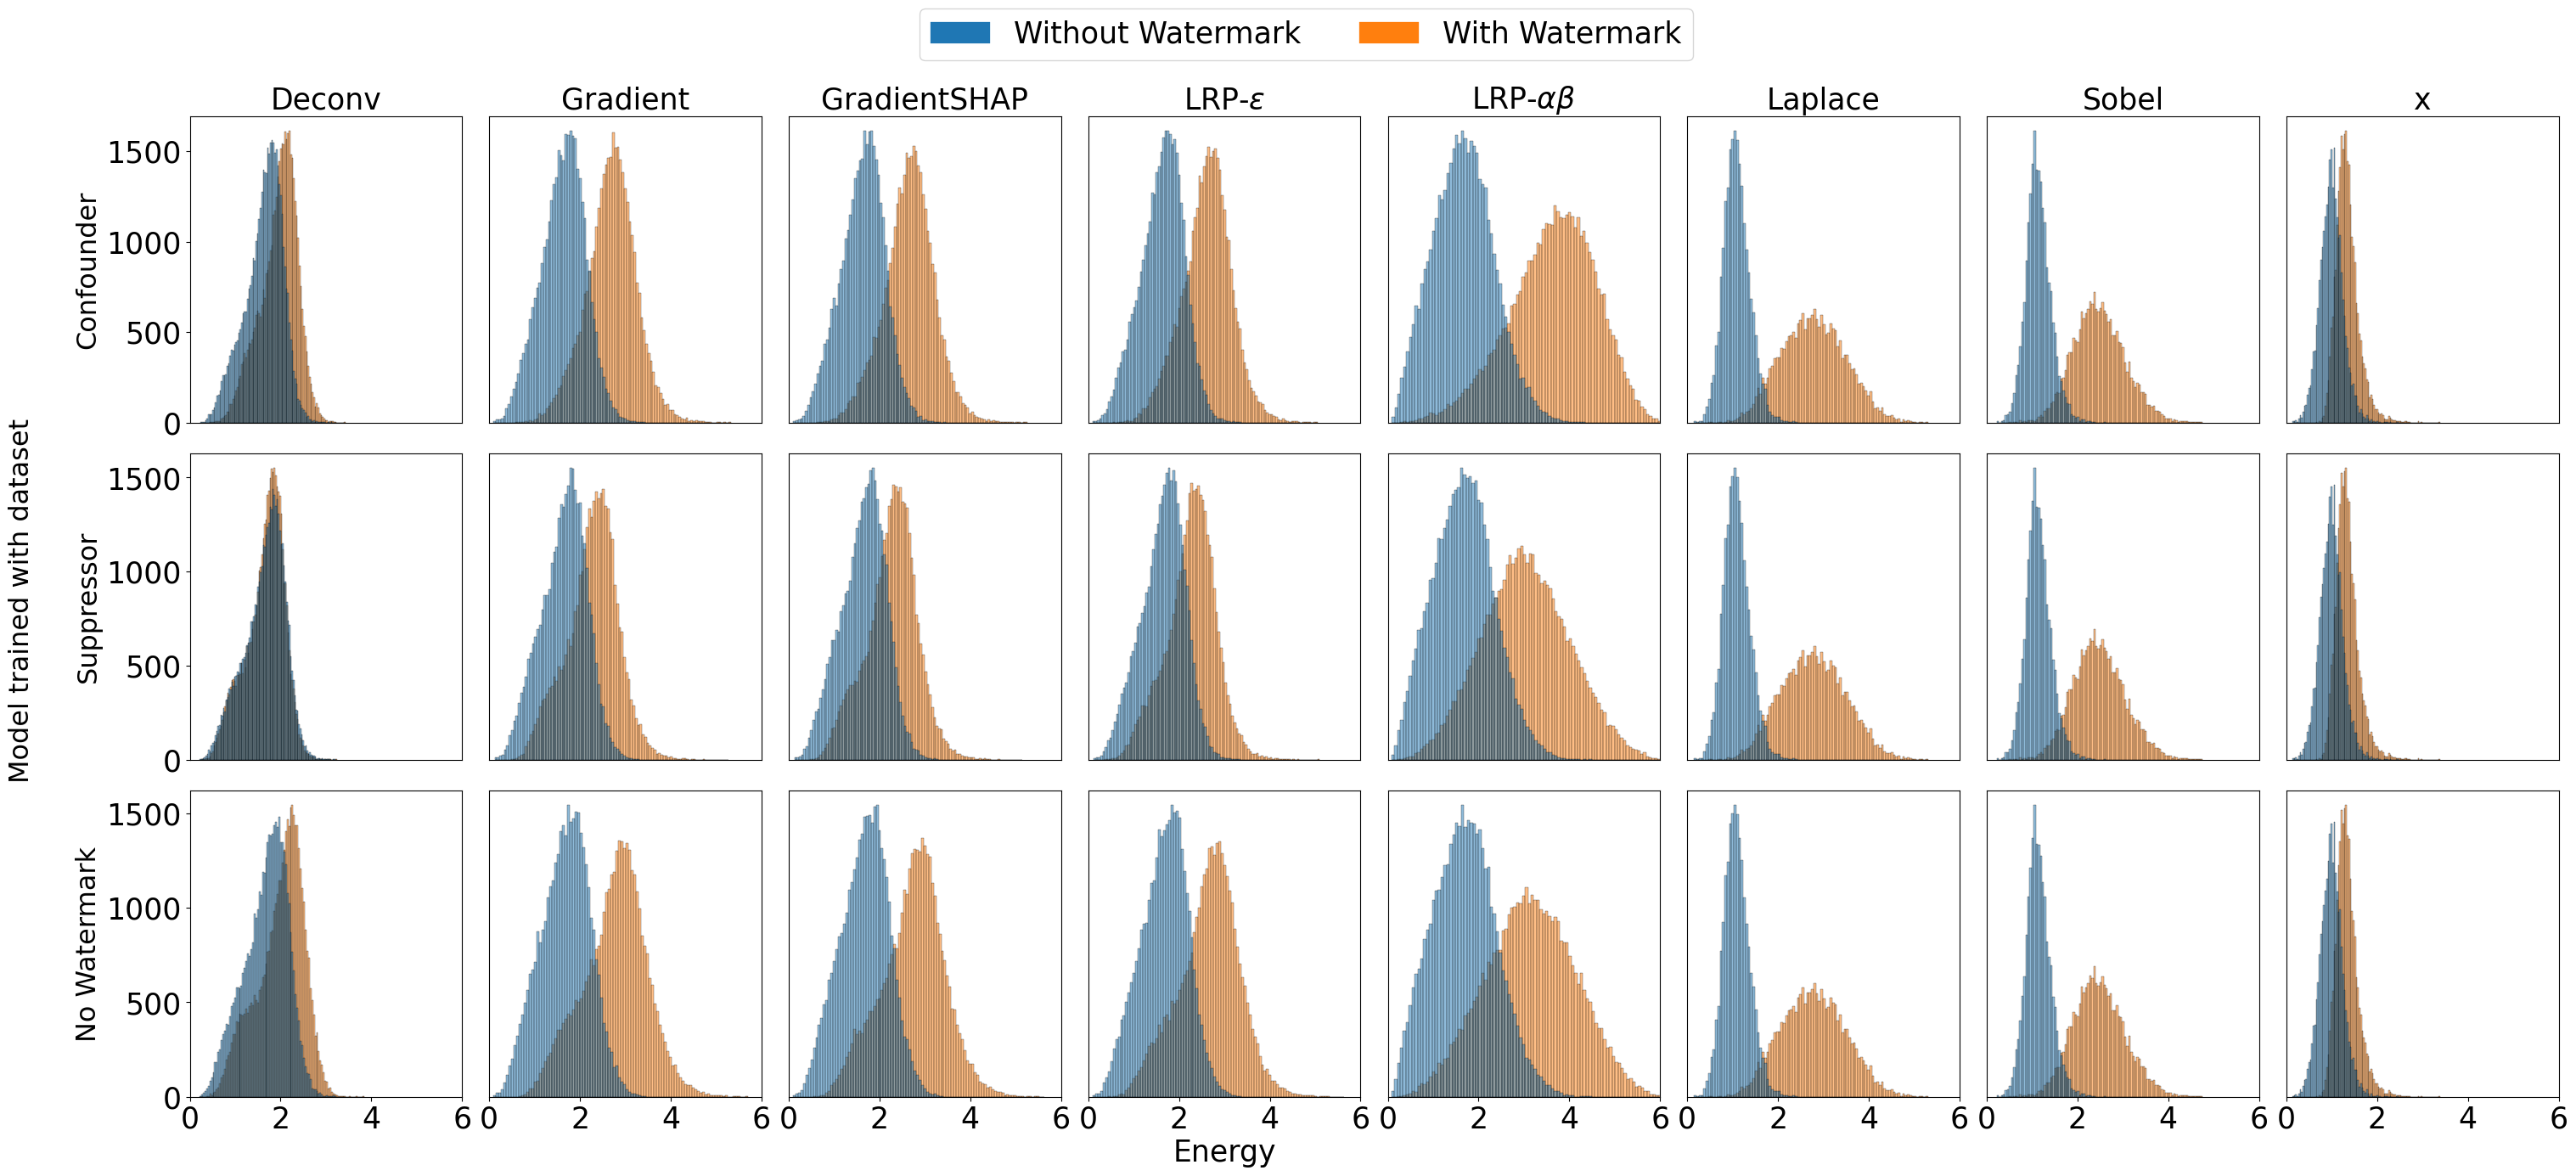

In [5]:
# import seaborn as sns
fig, axs = plt.subplots(3, 8, figsize=(36, 15))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
font_size=25
plt.rcParams['font.size'] = font_size
plt.rc('axes', titlesize=font_size) #title

for i in range(3): #model
    for j in range(8): #method
        #ex: train_energy[method][train][variant]
        g=sns.histplot(ax=axs[i, j],data=[train_energy[j][i][0],train_energy[j][i][1]],bins=100)
        axs[i, j].legend([],[], frameon=False)
        axs[i,j].set_ylabel('')
#         axs[i,j].set_ylim(0,200)
        
        if i!=2:
            axs[i,j].set_xticks([])
            
        if j!=0:
            axs[i,j].set_yticks([])
        
        axs[i,j].set_xlim(0, 6)
        # axs[i,1].set_xlim(0, 5)
        # axs[i,2].set_xlim(0, 5)
        # axs[i,3].set_xlim(0, 5)
    
axs[0,0].legend(['Without Watermark', 'With Watermark'],loc='upper center', bbox_to_anchor=(4.1, 1.4), ncol=2)
leg = axs[0,0].get_legend()
leg.legendHandles[0].set_color(sns.color_palette()[0])
leg.legendHandles[1].set_color(sns.color_palette()[1])
axs[0,0].title.set_text('Deconv')
axs[0,1].title.set_text('Gradient')
axs[0,2].title.set_text('GradientSHAP')
axs[0,3].title.set_text(r'LRP-$\epsilon$')
# axs[0,3].title.set_text('LIME')
axs[0,4].title.set_text(r'LRP-$\alpha$$\beta$')
axs[0,5].title.set_text('Laplace')
axs[0,6].title.set_text('Sobel')
axs[0,7].title.set_text('x')

plt.figtext(0.07,0.5,"Model trained with dataset", va="center", ha="center", size=font_size-2,rotation='vertical')
axs[0,0].set_ylabel('Confounder', size=font_size-2)
axs[1,0].set_ylabel('Suppressor', size=font_size-2)
axs[2,0].set_ylabel('No Watermark', size=font_size-2)

axs[2,3].set_xlabel('Energy', size=font_size)
# axs[2,3].xaxis.set_label_coords(1.15,-0.15)
plt.savefig('./figures/quantitative_plot_variable.png', bbox_inches='tight')
plt.savefig('./figures/quantitative_plot_variable_hires.png', bbox_inches='tight', dpi=300)